In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper

import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


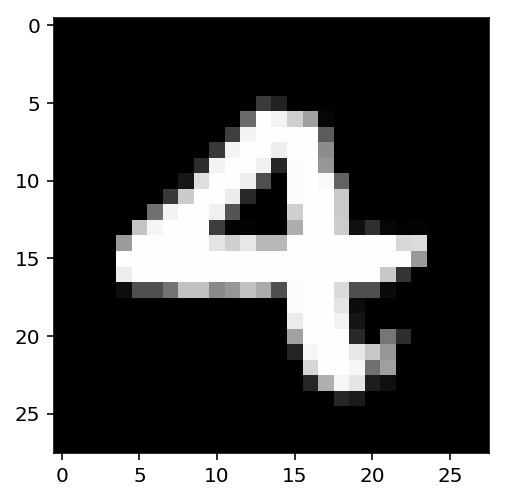

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [9]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create Parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out)

tensor([[-12.5323, -14.7686,   4.7122,  -1.7665, -16.0951,   8.3343,   8.5355,
          13.4721,  16.1705,  11.0815],
        [ -6.3839,  -9.4197,   8.5357,   6.8250, -23.1141,  -0.0589,   2.2560,
          10.6795,  10.6302,   7.2869],
        [ -8.3647, -15.6801,   7.8615,   3.8130, -16.2530,  15.0175,   2.5806,
          17.3729,  18.0013,   1.6031],
        [ -9.8682,  -5.7869,   2.1931,   8.8568, -20.0194,  -4.2962,   7.0906,
          16.6918,  13.0574,   8.4854],
        [ -5.1864,  -9.5968,  -1.2084,  14.1136, -22.6075,   8.1791,   2.7828,
          19.0422,  15.6693,   7.6555],
        [ -3.1337, -15.1901,   9.2683,  11.4938, -14.0274,   1.5478,   7.2010,
          17.9180,  15.8611,   5.4705],
        [-10.0619,  -6.3893,   0.4663,  10.9309, -18.9787,   8.2126,   4.9994,
          18.9705,   2.8315,   7.3802],
        [ -9.0592, -12.6247,  -0.6679,   7.7049, -19.2751,   8.4605,  15.6362,
          21.5555,  21.7250,   3.9000],
        [ -1.9390,  -4.0466,   5.2250,   9.4767,

In [10]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [13]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x


In [14]:
# Create the network
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [16]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x